In [2]:
import yfinance as yf
btc = yf.download(tickers='BTC-USD', start="2021-01-01", interval= '1h')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
btc

,Close
2021-01-01 00:00:00,29032.312500
2021-01-01 01:00:00,29411.566406
2021-01-01 02:00:00,29228.789062
2021-01-01 03:00:00,29330.333984
2021-01-01 04:00:00,29252.201172
...,...
2022-11-07 11:00:00,20744.871094
2022-11-07 12:00:00,20735.078125
2022-11-07 13:00:00,20733.451172
2022-11-07 14:00:00,20664.144531


In [5]:
lags = 5
cols = []
for lag in range(1,lags + 1):
    col = f'lag_{lag}'
    btc[col] = btc['Close'].shift(lag)
    cols.append(col)
btc.dropna(inplace=True)

In [7]:
import numpy as np
reg = np.linalg.lstsq(btc[cols], btc['Close'],rcond=None)[0]

In [8]:
reg

array([ 1.02592859, -0.05516038,  0.04037331, -0.05152141,  0.04034162])

<AxesSubplot: >

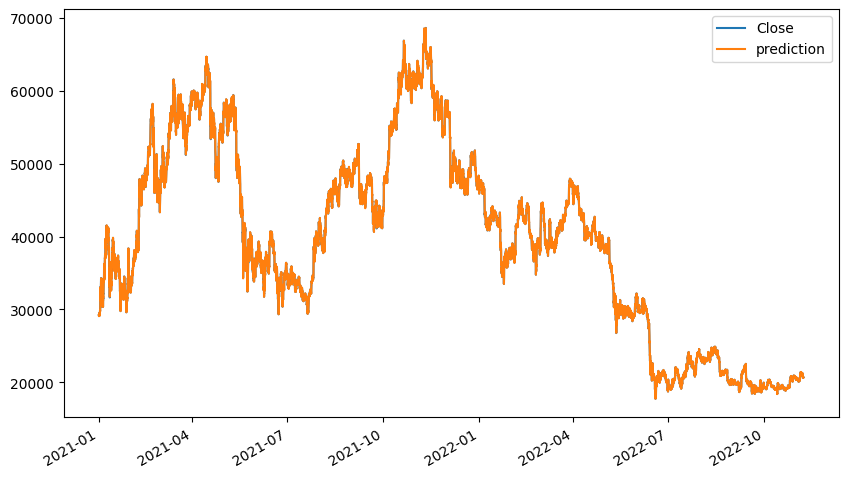

In [14]:

btc['prediction'] = np.dot(btc[cols], reg)
btc[['Close', 'prediction']].plot(figsize=(10, 6))

<AxesSubplot: >

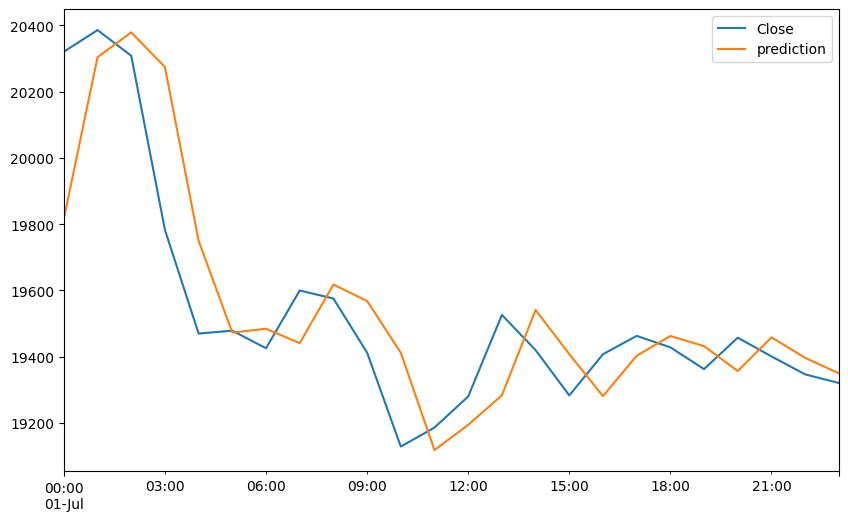

In [15]:
btc[['Close', 'prediction']].loc['2022-07-01'].plot(figsize=(10, 6))

In [16]:
btc['return'] = np.log(btc['Close']/btc['Close'].shift(1))

In [23]:
cols = []
for lag in range(1,lags + 1):
    col = f'lag_{lag}'
    btc[col] = btc['return'].shift(lag)
    cols.append(col)
btc.dropna(inplace=True)

In [25]:
reg = np.linalg.lstsq(btc[cols], btc['return'],rcond=None)[0]

In [19]:
reg

array([ 1.02592805, -0.05515798,  0.04036974, -0.05151249,  0.04033442])

<AxesSubplot: >

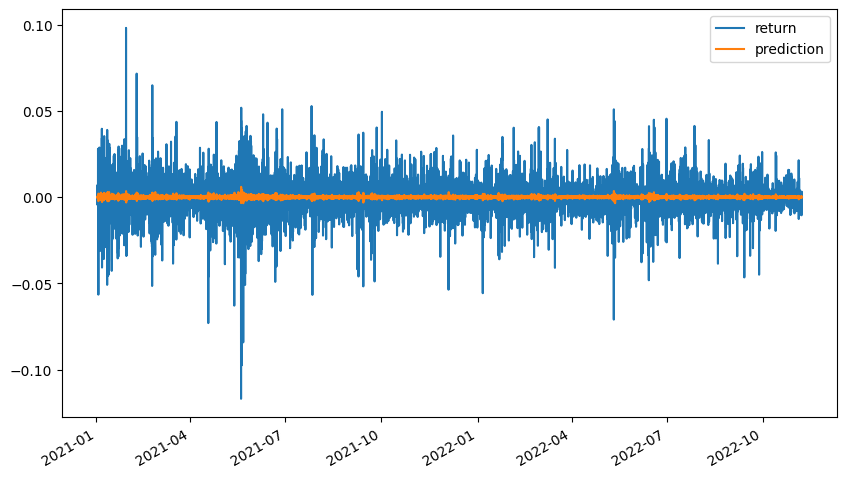

In [26]:
btc['prediction'] = np.dot(btc[cols], reg)
btc[['return', 'prediction']].iloc[lags:].plot(figsize=(10,6))

In [28]:
hits = np.sign(btc['return']*btc['prediction']).value_counts()

In [29]:
hits

 1.0    8139
-1.0    7831
dtype: int64

In [31]:
hits.values[0]/sum(hits)

0.5096430807764558

predicting future market decision

In [36]:
reg = np.linalg.lstsq(btc[cols], np.sign(btc['return']),rcond=None)[0]

In [37]:
reg

array([-0.79296703, -5.52587095, -2.74857877, -1.86220274, -1.65770586])

In [41]:
btc['prediction'] = np.sign(np.dot(btc[cols], reg))
btc['prediction'].value_counts()

-1.0    8130
 1.0    7840
Name: prediction, dtype: int64

In [42]:
hits = np.sign(btc['return']*btc['prediction']).value_counts()

In [43]:
hits

 1.0    8430
-1.0    7540
dtype: int64

In [44]:
hits.values[0]/sum(hits)

0.5278647463994991

In [45]:
btc.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
2021-01-01 15:00:00,29239.976562,-0.004414,0.007320,-0.001773,0.001459,0.002120,-1.0,-0.004507
2021-01-01 16:00:00,29362.417969,-0.004507,-0.004414,0.007320,-0.001773,0.001459,1.0,0.004179
2021-01-01 17:00:00,29172.779297,0.004179,-0.004507,-0.004414,0.007320,-0.001773,1.0,-0.006479
2021-01-01 18:00:00,29115.623047,-0.006479,0.004179,-0.004507,-0.004414,0.007320,-1.0,-0.001961
2021-01-01 19:00:00,29114.794922,-0.001961,-0.006479,0.004179,-0.004507,-0.004414,1.0,-0.000028


In [47]:
btc['strategy'] = btc['prediction']*btc['return']
btc[['return', 'strategy']].sum().apply(np.exp)

return      0.703701
strategy    1.006849
dtype: float64

<AxesSubplot: >

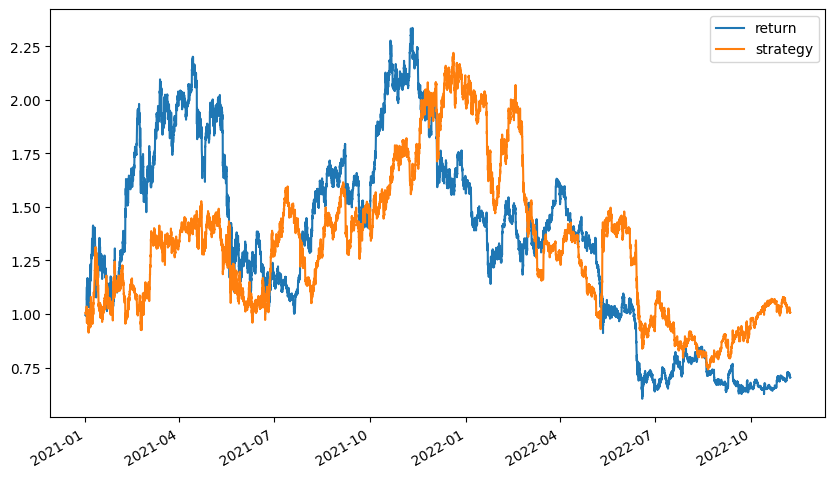

In [49]:
btc[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))